
Hierarchical Clustering in Machine Learning
Last Updated : 11 Mar, 2024

In data mining and statistics, hierarchical clustering analysis is a method of clustering analysis that seeks to build a hierarchy of clusters i.e. tree-type structure based on the hierarchy. 

In machine learning, clustering is the unsupervised learning technique that groups the data based on similarity between the set of data. There are different-different types of clustering algorithms in machine learning. Connectivity-based clustering: This type of clustering algorithm builds the cluster based on the connectivity between the data points. Example: Hierarchical clustering

    Centroid-based clustering: This type of clustering algorithm forms around the centroids of the data points. Example: K-Means clustering, K-Mode clustering
    Distribution-based clustering: This type of clustering algorithm is modeled using statistical distributions. It assumes that the data points in a cluster are generated from a particular probability distribution, and the algorithm aims to estimate the parameters of the distribution to group similar data points into clusters Example: Gaussian Mixture Models (GMM)
    Density-based clustering: This type of clustering algorithm groups together data points that are in high-density concentrations and separates points in low-concentrations regions. The basic idea is that it identifies regions in the data space that have a high density of data points and groups those points together into clusters. Example: DBSCAN(Density-Based Spatial Clustering of Applications with Noise)


Hierarchical clustering

Hierarchical clustering is a connectivity-based clustering model that groups the data points together that are close to each other based on the measure of similarity or distance. The assumption is that data points that are close to each other are more similar or related than data points that are farther apart.

A dendrogram, a tree-like figure produced by hierarchical clustering, depicts the hierarchical relationships between groups. Individual data points are located at the bottom of the dendrogram, while the largest clusters, which include all the data points, are located at the top. In order to generate different numbers of clusters, the dendrogram can be sliced at various heights.

The dendrogram is created by iteratively merging or splitting clusters based on a measure of similarity or distance between data points. Clusters are divided or merged repeatedly until all data points are contained within a single cluster, or until the predetermined number of clusters is attained.

We can look at the dendrogram and measure the height at which the branches of the dendrogram form distinct clusters to calculate the ideal number of clusters. The dendrogram can be sliced at this height to determine the number of clusters.

Types of Hierarchical Clustering

Basically, there are two types of hierarchical Clustering:

    Agglomerative Clustering
    Divisive clustering


Hierarchical Agglomerative Clustering

It is also known as the bottom-up approach or hierarchical agglomerative clustering (HAC). A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerate pairs of clusters until all clusters have been merged into a single cluster that contains all data. 

In [3]:
# Algorithm 

given a dataset (d1, d2, d3, ....dN) of size N
# compute the distance matrix
for i=1 to N:
   # as the distance matrix is symmetric about 
   # the primary diagonal so we compute only lower 
   # part of the primary diagonal 
   for j=1 to i:
      dis_mat[i][j] = distance[di, dj] 
each data point is a singleton cluster
repeat
   merge the two cluster having minimum distance
   update the distance matrix
until only a single cluster remains

Steps:

    Consider each alphabet as a single cluster and calculate the distance of one cluster from all the other clusters.
    In the second step, comparable clusters are merged together to form a single cluster. Let’s say cluster (B) and cluster (C) are very similar to each other therefore we merge them in the second step similarly to cluster (D) and (E) and at last, we get the clusters [(A), (BC), (DE), (F)]
    We recalculate the proximity according to the algorithm and merge the two nearest clusters([(DE), (F)]) together to form new clusters as [(A), (BC), (DEF)]
    Repeating the same process; The clusters DEF and BC are comparable and merged together to form a new cluster. We’re now left with clusters [(A), (BCDEF)].
    At last, the two remaining clusters are merged together to form a single cluster [(ABCDEF)].


In [5]:
from sklearn.cluster import AgglomerativeClustering 
import numpy as np 

# randomly chosen dataset 
X = np.array([[1, 2], [1, 4], [1, 0], 
			[4, 2], [4, 4], [4, 0]]) 

# here we need to mention the number of clusters 
# otherwise the result will be a single cluster 
# containing all the data 
clustering = AgglomerativeClustering(n_clusters=2).fit(X) 

# print the class labels 
print(clustering.labels_) 

[1 1 1 0 0 0]


Hierarchical Divisive clustering

It is also known as a top-down approach. This algorithm also does not require to prespecify the number of clusters. Top-down clustering requires a method for splitting a cluster that contains the whole data and proceeds by splitting clusters recursively until individual data have been split into singleton clusters.

Algorithm : 

given a dataset (d1, d2, d3, ....dN) of size N
at the top we have all data in one cluster
the cluster is split using a flat clustering method eg. K-Means etc
repeat
choose the best cluster among all the clusters to split
split that cluster by the flat clustering algorithm
until each data is in its own singleton cluster

Computing Distance Matrix

While merging two clusters we check the distance between two every pair of clusters and merge the pair with the least distance/most similarity. But the question is how is that distance determined. There are different ways of defining Inter Cluster distance/similarity. Some of them are:

    Min Distance: Find the minimum distance between any two points of the cluster.
    Max Distance: Find the maximum distance between any two points of the cluster.
    Group Average: Find the average distance between every two points of the clusters.
    Ward’s Method: The similarity of two clusters is based on the increase in squared error when two clusters are merged.

In [7]:
## Implementations code

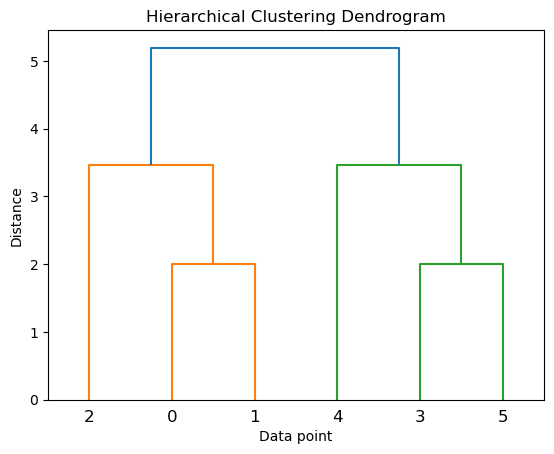

In [11]:
import numpy as np 
from scipy.cluster.hierarchy import dendrogram, linkage 
import matplotlib.pyplot as plt 

# randomly chosen dataset 
X = np.array([[1, 2], [1, 4], [1, 0], 
			[4, 2], [4, 4], [4, 0]]) 

# Perform hierarchical clustering 
Z = linkage(X, 'ward') 

# Plot dendrogram 
dendrogram(Z) 

plt.title('Hierarchical Clustering Dendrogram') 
plt.xlabel('Data point') 
plt.ylabel('Distance') 
plt.show()

In [9]:
X

array([[1, 2],
       [1, 4],
       [1, 0],
       [4, 2],
       [4, 4],
       [4, 0]])

Hierarchical Agglomerative vs Divisive Clustering 

    Divisive clustering is more complex as compared to agglomerative clustering, as in the case of divisive clustering we need a flat clustering method as “subroutine” to split each cluster until we have each data having its own singleton cluster.
    Divisive clustering is more efficient if we do not generate a complete hierarchy all the way down to individual data leaves. The time complexity of a naive agglomerative clustering is O(n3) because we exhaustively scan the N x N matrix dist_mat for the lowest distance in each of N-1 iterations. Using priority queue data structure we can reduce this complexity to O(n2logn). By using some more optimizations it can be brought down to O(n2). Whereas for divisive clustering given a fixed number of top levels, using an efficient flat algorithm like K-Means, divisive algorithms are linear in the number of patterns and clusters.
    A divisive algorithm is also more accurate. Agglomerative clustering makes decisions by considering the local patterns or neighbor points without initially taking into account the global distribution of data. These early decisions cannot be undone. whereas divisive clustering takes into consideration the global distribution of data when making top-level partitioning decisions.